In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [16]:
data_fake = pd.read_csv(r"C:/Users/akash/Downloads/News-_dataset/Fake.csv")
data_true = pd.read_csv(r"C:/Users/akash/Downloads/News-_dataset/True.csv")

In [17]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [18]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [19]:
data_fake["class"] = 0
data_true["class"] = 1

In [20]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [21]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)
    

data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i], axis = 0, inplace = True)    

In [22]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [23]:
data_fake_manual_testing["class"] = 0
data_true_manual_testing["class"] = 1

C:\Users\akash\AppData\Local\Temp\ipykernel_26644\4042680642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing["class"] = 0
C:\Users\akash\AppData\Local\Temp\ipykernel_26644\4042680642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing["class"] = 1


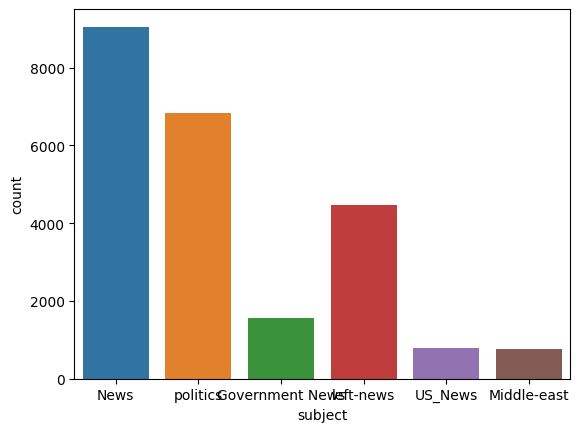

In [24]:
sns.countplot(x='subject',data=data_fake)
plt.savefig('fake_classification.png')

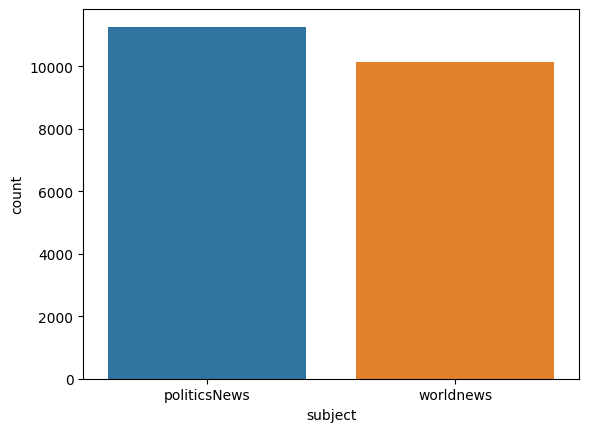

In [25]:
sns.countplot(x='subject',data=data_true)
plt.savefig('true_classification.png')

In [26]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [27]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [28]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [29]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [30]:
data = data.sample(frac = 1)

In [31]:
data.head()

,text,class
14218,"Yes, it s really hard to be a dictator in Amer...",0
4271,"Donald Trump, at the second presidential debat...",0
5965,As Trump begins his second try at softening ...,0
18430,GAZA (Reuters) - Prime Minister Rami al-Hamdal...,1
1473,Everyone knows that Donald Trump absolutely HA...,0


In [32]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [33]:
data.columns


Index(['text', 'class'], dtype='object')

In [34]:
data.head()

,text,class
0,"Yes, it s really hard to be a dictator in Amer...",0
1,"Donald Trump, at the second presidential debat...",0
2,As Trump begins his second try at softening ...,0
3,GAZA (Reuters) - Prime Minister Rami al-Hamdal...,1
4,Everyone knows that Donald Trump absolutely HA...,0


In [35]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '',text)
    text=re.sub(' (.*)reuters(.*)','',text)
    return text

In [36]:
data ['text'] = data['text'].apply(wordopt)

In [37]:
x = data['text']
y = data['class']

In [38]:
x.tail()

44873    washington
44874    washington
44875         paris
44876       baghdad
44877       chicago
Name: text, dtype: object

In [39]:
y.tail()

44873    1
44874    1
44875    1
44876    1
44877    1
Name: class, dtype: int64

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [41]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((11220,), (33658,), (11220,), (33658,))

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [44]:
pred_lr=LR.predict(xv_test)

In [45]:
LR.score(xv_test,y_test)

0.9820855614973262

In [46]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5836
           1       0.97      1.00      0.98      5384

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [50]:
lr_probs=LR.predict_proba(xv_test)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))

Logistic: ROC AUC=0.998


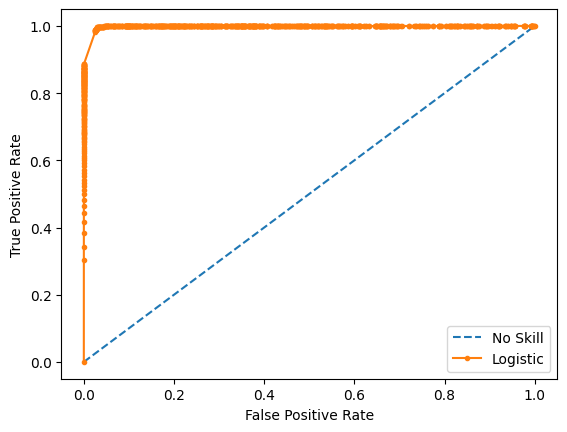

In [81]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_LR.png')
pyplot.show()


In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Logistic: f1=0.982 auc=0.998


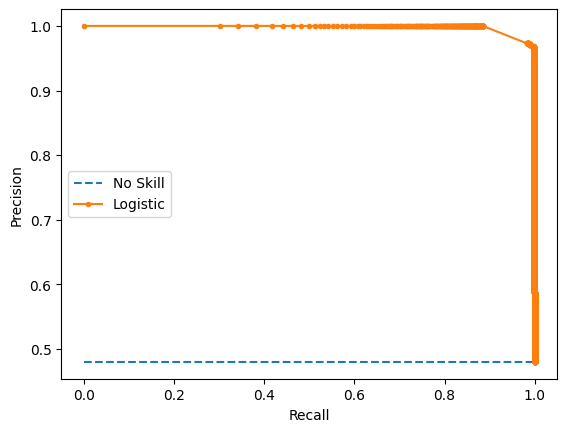

In [80]:
lr_probs = LR.predict_proba(xv_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = LR.predict(xv_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_LR.png')
pyplot.show()


In [55]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
dt=DT.fit(xv_train,y_train)

In [56]:
pred_dt=DT.predict(xv_test)

In [57]:
DT.score(xv_test,y_test)

0.982620320855615

In [58]:
print(classification_report(y_test,pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5836
           1       0.97      1.00      0.98      5384

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



Logistic: ROC AUC=0.998


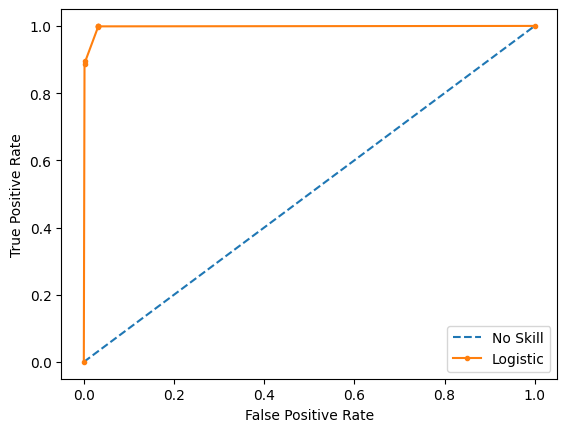

Logistic: f1=0.982 auc=0.997


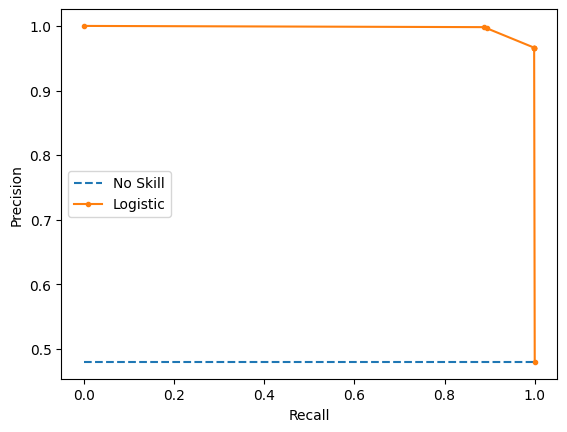

In [79]:
dt_probs=dt.predict_proba(xv_test)
ns_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_DT.png')
pyplot.show()

dt_probs = dt.predict_proba(xv_test)
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]
# predict class values
yhat = dt.predict(xv_test)
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_probs)
dt_f1, dt_auc = f1_score(y_test, yhat), auc(dt_recall, dt_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_DT.png')
pyplot.show()


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

GB=GradientBoostingClassifier(random_state=0)
gb=GB.fit(xv_train,y_train)

In [64]:
pred_gb=GB.predict(xv_test)

In [65]:
GB.score(xv_test,y_test)

0.9784313725490196

In [66]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      5836
           1       0.96      1.00      0.98      5384

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



Logistic: ROC AUC=0.998


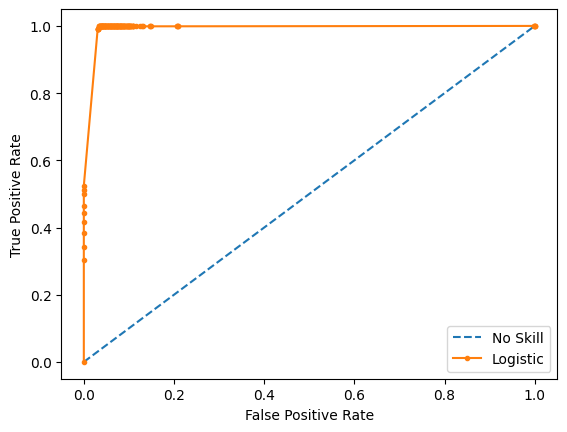

Logistic: f1=0.978 auc=0.992


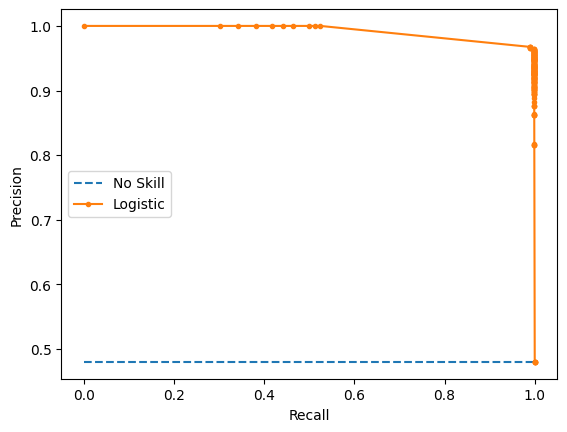

In [78]:
gb_probs=gb.predict_proba(xv_test)
ns_probs = [0 for _ in range(len(y_test))]
gb_probs = gb_probs[:, 1]
gb_auc = roc_auc_score(y_test, gb_probs)
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_auc_GB.png')
pyplot.show()

gb_probs = gb.predict_proba(xv_test)
# keep probabilities for the positive outcome only
gb_probs = gb_probs[:, 1]
# predict class values
yhat = gb.predict(xv_test)
gb_precision, gb_recall, _ = precision_recall_curve(y_test, gb_probs)
gb_f1, gb_auc = f1_score(y_test, yhat), auc(gb_recall, gb_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_GB.png')
pyplot.show()


In [69]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
rf=RF.fit(xv_train,y_train)

In [70]:
pred_rf=RF.predict(xv_test)

In [71]:
RF.score(xv_test,y_test)

0.9836898395721925

In [72]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5836
           1       0.97      1.00      0.98      5384

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



In [73]:
rf_probs=rf.predict_proba(xv_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Logistic: ROC AUC=%.3f' % (rf_auc))

Logistic: ROC AUC=0.998


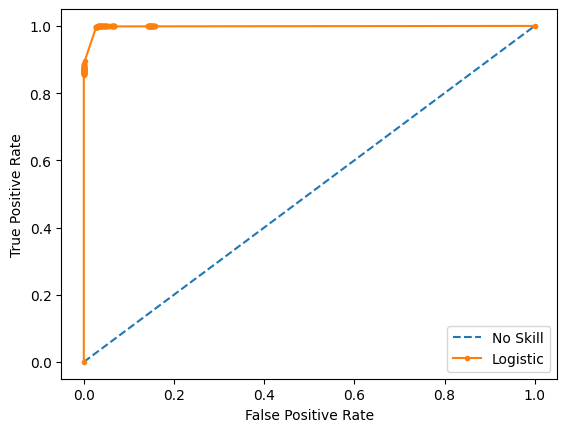

In [77]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
plt.savefig('roc_aur_RF.png')
pyplot.show()


Logistic: f1=0.983 auc=0.998


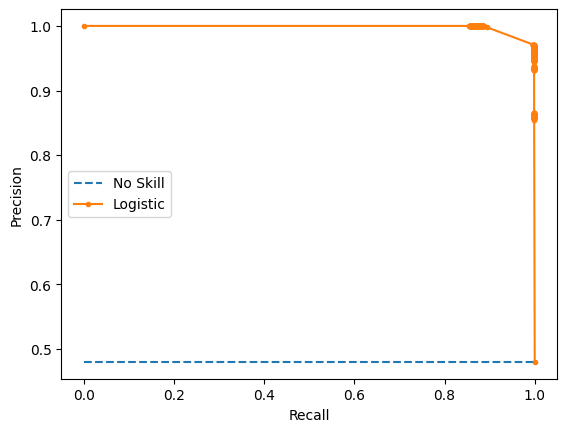

In [76]:
rf_probs = rf.predict_proba(xv_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]
# predict class values
yhat = rf.predict(xv_test)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
rf_f1, rf_auc = f1_score(y_test, yhat), auc(rf_recall, rf_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
plt.savefig('precision-recall_RF.png')
pyplot.show()


In [46]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not a Fake News"

In [47]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_RFC = RF.predict(new_xv_test)

    return print("\nRFC Prediction: {}".format(output_lable(pred_RFC[0])))

In [48]:
news=str(input())
manual_testing(news)

As the country's northwestern regions begin to receive the monsoon season's first strong showers, conditions have already begun to turn dire for Himachal Pradesh and Uttarakhand.  Intense rains pummelled many districts of Himachal Pradesh this weekend in a cloudburst-like scenario, leading to landslides, flash floods and other weather snarls that have already claimed two lives in the state.  The torrential rain led to many rivers running dangerously in spate in the region, including the river Beas. As a precautionary measure, authorities opened the floodgates of the Pandoh dam to drain water from the overflowing river.   However, the severe monsoon rainfall had already left its mark. In addition to several stretches of roads being waterlogged (and one even washed away), over a dozen vehicles — including tractors and SUVs — swept away in the state's flash floods. Many structures, including houses, sustained severe damage in the rainy devastation.   As per the State Disaster Management A